## Task 2: Classification

##Dataset: Retail Web Session Intelligence (RWSI)

The Retail Web Session Intelligence (RWSI) dataset simulates customer interactions on a digital retail platform that sells consumer and lifestyle products.
- Each record represents an anonymized user session, capturing browsing patterns, engagement metrics, contextual attributes, and conversion outcomes.
- The goal is to build predictive and diagnostic models that help understand what drives successful purchase intent and user engagement.

#Problem Statement
Develop a model that can predict the likelihood of a conversion event (MonetaryConversion) based on a user’s browsing behavior, engagement metrics, and contextual factors.


##Your task is to:
- Understand digital behavior data — explore session-level features such as browsing patterns, engagement metrics, and contextual variables (e.g., region, month, traffic source).
-  Perform exploratory data analysis (EDA) — identify trends, correlations, and anomalies; visualize how behavior differs between converting and non-converting sessions.
- Handle missing values
- Engineer new features
- Build predictive models
- Evaluate performance
- Interpret model results
- Communicate findings — summarize insights into what differentiates high-intent shoppers from casual browsers.

## EDA (Exploratory Data Analysis)

In [ ]:
import pandas as pd #import dependencies
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/content/rwsi_data.csv') #raw data
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [ ]:
df.dtypes.to_frame()

,0
SessionID,object
AdClicks,float64
InfoSectionCount,float64
InfoSectionTime,float64
HelpPageVisits,float64
HelpPageTime,float64
ItemBrowseCount,float64
ItemBrowseTime,float64
ExitRateFirstPage,float64
SessionExitRatio,float64


In [ ]:
df.isnull().sum()

,0
SessionID,0
AdClicks,863
InfoSectionCount,369
InfoSectionTime,369
HelpPageVisits,246
HelpPageTime,246
ItemBrowseCount,493
ItemBrowseTime,493
ExitRateFirstPage,123
SessionExitRatio,246


In [ ]:
df['MonetaryConversion'].value_counts() #to view target distribution

,count
MonetaryConversion,
No,10422
Yes,1908


- From this we can know that there are few null points but its small when comapared to the large dataset.
- Also an we have to address the class imbalnce as the imbalance is severe approx 85:15.

In [ ]:
df_nandrop = df.dropna()
output_path = '/content/rwsi_data_nandrop.csv'
df_nandrop.to_csv(output_path, index=False)

In [ ]:
df_nandrop.describe()

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,TrafficSourceCode
count,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.00000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000
mean,2.006299,2.341509,79.944291,0.497520,33.853681,31.77121,1205.351249,0.022632,0.043361,5.877667,0.059054,4.015950
std,1.421809,3.359629,174.514220,1.261473,141.598695,44.30031,1988.536334,0.049373,0.049323,18.002856,0.194296,3.992941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.00000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000
50%,2.000000,1.000000,9.000000,0.000000,0.000000,18.00000,600.500000,0.003175,0.025000,0.000000,0.000000,2.000000
75%,3.000000,4.000000,94.700000,0.000000,0.000000,38.00000,1476.021429,0.016842,0.050000,0.000000,0.000000,4.000000
max,4.000000,27.000000,3398.750000,24.000000,2549.375000,705.00000,63973.522230,0.200000,0.200000,360.953384,1.000000,20.000000


In [ ]:
fig = px.histogram(df_nandrop, x='MonetaryConversion', title='Target Distribution')
fig.show()

In [ ]:
file_path = '/content/rwsi_data_nandrop.csv'
df = pd.read_csv(file_path)
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.20000,0.200000,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.20000,0.200000,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
2,Sh1EYwNiXcpybejd,4.0,0.0,0.0,0.0,0.0,1.0,0.00,0.20000,0.200000,0.0,0.4,February,Android,Edge,Asia-Pacific,3.0,Returning,False,No
3,ce2ZN1VHlrRHgmUl,0.0,0.0,0.0,0.0,0.0,3.0,395.00,0.00000,0.066667,0.0,0.0,February,Windows,Safari,Asia-Pacific,3.0,Returning,False,No
4,MF1J9gxqh9HKCCgf,2.0,0.0,0.0,0.0,0.0,16.0,407.75,0.01875,0.025833,0.0,0.4,February,Windows,Safari,South America,3.0,Returning,False,No


In [ ]:
print(f"Shape: {df.shape}")

Shape: (7461, 20)


- By dropping the null values now the data size have reduced
- Now let's see the correlation between the varriables.

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = df[numeric_columns].corr()

print("\n Correlation Matrix:\n")
display(corr_matrix)


 Correlation Matrix:



,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,TrafficSourceCode
AdClicks,1.000000,-0.020010,-0.009380,-0.006979,0.005458,-0.005825,-0.005863,-0.001573,-0.001429,-0.021658,-0.024541,-0.027336
InfoSectionCount,-0.020010,1.000000,0.610144,0.385067,0.266688,0.433834,0.361507,-0.226810,-0.316074,0.107767,-0.086181,-0.030284
InfoSectionTime,-0.009380,0.610144,1.000000,0.328301,0.279895,0.305411,0.379383,-0.145418,-0.204074,0.078881,-0.067358,-0.016526
HelpPageVisits,-0.006979,0.385067,0.328301,1.000000,0.616372,0.394211,0.397293,-0.119127,-0.165461,0.056386,-0.044085,-0.026379
HelpPageTime,0.005458,0.266688,0.279895,0.616372,1.000000,0.292665,0.375476,-0.074219,-0.102606,0.037185,-0.027776,-0.022149
ItemBrowseCount,-0.005825,0.433834,0.305411,0.394211,0.292665,1.000000,0.852250,-0.209311,-0.295681,0.065318,-0.019327,-0.054323
ItemBrowseTime,-0.005863,0.361507,0.379383,0.397293,0.375476,0.852250,1.000000,-0.181134,-0.244590,0.059518,-0.029354,-0.041812
ExitRateFirstPage,-0.001573,-0.226810,-0.145418,-0.119127,-0.074219,-0.209311,-0.181134,1.000000,0.915302,-0.123870,0.067233,0.076477
SessionExitRatio,-0.001429,-0.316074,-0.204074,-0.165461,-0.102606,-0.295681,-0.244590,0.915302,1.000000,-0.179428,0.087387,0.085842
PageEngagementScore,-0.021658,0.107767,0.078881,0.056386,0.037185,0.065318,0.059518,-0.123870,-0.179428,1.000000,-0.065542,0.011282


In [ ]:
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    title='Correlation Matrix',
    color_continuous_scale='RdBu_r'
)
fig.update_layout(title_x=0.5)
fig.show()

- From the heatmap its evident that there is few strongly correlated independent variables.
- We will be imputating these on later stage.

### Visualization Of Data

In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='AdClicks',
    color='MonetaryConversion',
    title='AdClicks vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='InfoSectionCount',
    color='MonetaryConversion',
    title='InfoSectionCount vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='InfoSectionTime',
    color='MonetaryConversion',
    title='InfoSectionTime vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='HelpPageVisits',
    color='MonetaryConversion',
    title='HelpPageVisits vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='ItemBrowseCount',
    color='MonetaryConversion',
    title='ItemBrowseCount vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='ExitRateFirstPage',
    color='MonetaryConversion',
    title='ExitRateFirstPage vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='PageEngagementScore',
    color='MonetaryConversion',
    title='PageEngagementScore vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='HolidayProximityIndex',
    color='MonetaryConversion',
    title='HolidayProximityIndex vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.box(
    df,
    x='MonetaryConversion',
    y='TrafficSourceCode',
    color='MonetaryConversion',
    title='TrafficSourceCode vs MonetaryConversion',
    points='all'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x='VisitMonth',
    color='MonetaryConversion',
    barmode='group',
    text_auto=True,
    title='VisitMonth vs MonetaryConversion'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x='UserPlatformID',
    color='MonetaryConversion',
    barmode='group',
    text_auto=True,
    title='UserPlatformID vs MonetaryConversion'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x='WebClientCode',
    color='MonetaryConversion',
    barmode='group',
    text_auto=True,
    title='WebClientCode vs MonetaryConversion'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x='MarketZone',
    color='MonetaryConversion',
    barmode='group',
    text_auto=True,
    title='MarketZone vs MonetaryConversion'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x='UserCategory',
    color='MonetaryConversion',
    barmode='group',
    text_auto=True,
    title='UserCategory vs MonetaryConversion'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x='IsWeekendVisit',
    color='MonetaryConversion',
    barmode='group',
    text_auto=True,
    title='IsWeekendVisit vs MonetaryConversion'
)
fig.update_layout(title_x=0.5)
fig.show()


- From the visualization its evident that the target varriable i.e yes/no is is highly dependent on the categorical values like vistmonth usercategory marketzone etc.
- This trends are identical to real world market/sales trends where a specific month yields more conversion as well as a specific country/area.
- Although few of them might show high relevancy wherein actually it might be low as it may consist of outliers.


## Outliers Mitigation

In [ ]:
df = pd.read_csv("/content/rwsi_data_nandrop.csv")

In [ ]:
limits_yes = {
    'AdClicks': (0, 4, 0),
    'InfoSectionCount': (0, 15, 0),
    'InfoSectionTime': (0, 800, 0),
    'HelpPageVisits': (0, 6, 0),
    'HelpPageTime': (0, 800, 0),
    'ItemBrowseCount': (0, 250, 0),
    'ItemBrowseTime': (0, 10000, 0),
    'ExitRateFirstPage': (0, 0.4, 3),
    'SessionExitRatio': (0, 0.7, 3),
    'PageEngagementScore': (0, 150, 2),
    'HolidayProximityIndex': (0, 1, 3),
    'TrafficSourceCode': (1, 13, 0)
}        # range for Yes

In [ ]:
limits_no = {
    'AdClicks': (0, 4, 0),
    'InfoSectionCount': (0, 18, 0),
    'InfoSectionTime': (0, 850, 0),
    'HelpPageVisits': (0, 9, 0),
    'HelpPageTime': (0, 850, 0),
    'ItemBrowseCount': (0, 300, 0),
    'ItemBrowseTime': (0, 13000, 0),
    'ExitRateFirstPage': (0, 0.2, 3),
    'SessionExitRatio': (0, 0.2, 3),
    'PageEngagementScore': (0, 60, 2),
    'HolidayProximityIndex': (0, 1, 3),
    'TrafficSourceCode': (1, 20, 0)
}        # range for No

In [ ]:
def smooth_cap(value, lower, upper, decimals):
    if value < lower:
        return round(lower + np.random.uniform(0, (upper - lower) * 0.05), decimals)
    elif value > upper:
        return round(upper - np.random.uniform(0, (upper - lower) * 0.05), decimals)
    else:
        return round(value, decimals)        # capping off limit values values

In [ ]:
for col in limits_yes.keys():
    lower_y, upper_y, dec_y = limits_yes[col]
    lower_n, upper_n, dec_n = limits_no[col]

    df.loc[df['MonetaryConversion'] == 'Yes', col] = df.loc[df['MonetaryConversion'] == 'Yes', col].apply(
        lambda x: smooth_cap(x, lower_y, upper_y, dec_y)
    )

    df.loc[df['MonetaryConversion'] == 'No', col] = df.loc[df['MonetaryConversion'] == 'No', col].apply(
        lambda x: smooth_cap(x, lower_n, upper_n, dec_n)
    )          # applying limits separately

In [ ]:
output_path = "/content/rwsi_data_out_rep.csv"
df.to_csv(output_path, index=False)

- These ranges are calculated/observed from the scatter plot plotted against the target variable.
- Rather than running a loop to mitigate all outliers at once, this approach yields a much more stable model.
- In a loop, we might consider the mean/median (25%,50%, 75%) of the data as the min and max values, but the spread might look entirely different on a scatter plot.
- Hence, we could end up removing actual data points along with the outliers.

## Data Augmentation (Oversampling 'Yes')



In [ ]:
df = pd.read_csv("/content/rwsi_data_out_rep.csv")
df_yes = df[df['MonetaryConversion'] == 'Yes']
df_no = df[df['MonetaryConversion'] == 'No']

In [ ]:
num_cols = df_yes.select_dtypes(include=np.number).columns.tolist()

In [ ]:
round_limits = {
    'AdClicks': (0, 4, 0),
    'InfoSectionCount': (0, 15, 0),
    'InfoSectionTime': (0, 800, 0),
    'HelpPageVisits': (0, 6, 0),
    'HelpPageTime': (0, 800, 0),
    'ItemBrowseCount': (0, 250, 0),
    'ItemBrowseTime': (0, 10000, 0),
    'ExitRateFirstPage': (0, 0.4, 3),
    'SessionExitRatio': (0, 0.7, 3),
    'PageEngagementScore': (0, 150, 2),
    'HolidayProximityIndex': (0, 1, 3),
    'TrafficSourceCode': (1, 13, 0)
}  # rounding values and taking limits

In [ ]:
def create_variations(row, n=6):
    variations = [] # dummy variations
    for _ in range(n):
        new_row = row.copy()
        for col in num_cols:
            val = row[col]
            if pd.notna(val):
                variation = val * np.random.uniform(0.7, 1.0)
                if col in round_limits:
                    min_val, max_val, decimals = round_limits[col]
                    if max_val is not None:
                        variation = np.clip(variation, min_val, max_val)
                    else:
                        variation = max(variation, min_val)
                    variation = round(variation, decimals)
                else:
                    variation = round(variation, 3)
                new_row[col] = variation
        variations.append(new_row)
    return variations

In [ ]:
augmented_rows = [] # augmented Yes rows
for idx, row in df_yes.iterrows():
    augmented_rows.extend(create_variations(row, n=6))

df_yes_augmented = pd.DataFrame(augmented_rows)

In [ ]:
df_final = pd.concat([df_no, df_yes_augmented], ignore_index=True)

df_final.to_csv("/content/rwsi_data_augmented.csv", index=False) # combine n save

In [ ]:
df_final['MonetaryConversion'].value_counts()

,count
MonetaryConversion,
Yes,6966
No,6300


- These ranges are calculated/observed from the scatter plot plotted against the target variable, similar to what we did during outlier mitigation.
- After defining the range, we create six dummy instances for each row labeled as ‘Yes’.
- The values are filled such that, at any given instance, they can take any value within the specified range.
- This ensures no unwanted pattern formation, as we introduce variability and randomness rather than simply duplicating rows.


##One-Hot Encoding

In [ ]:
df = pd.read_csv("/content/rwsi_data_augmented.csv")

In [ ]:
cat_cols = ['UserCategory', 'IsWeekendVisit', 'VisitMonth', 'UserPlatformID', 'WebClientCode', 'MarketZone'] #select columns to encode

In [ ]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False, dtype=int)

In [ ]:
df_encoded['MonetaryConversion'] = df_encoded['MonetaryConversion'].map({'No': 0, 'Yes': 1}) # Convert Yes/No to 1/0

In [ ]:
cols = [c for c in df_encoded.columns if c != 'MonetaryConversion'] + ['MonetaryConversion']
df_encoded = df_encoded[cols] # Move target column to last column

In [ ]:
df_encoded.to_csv("/content/rwsi_data_encoded_final.csv", index=False) # save CSV

print("Shape:", df_encoded.shape)

Shape: (13266, 59)


##New Correlation

In [ ]:
df = pd.read_csv("/content/rwsi_data_encoded_final.csv")

In [ ]:
if 'SessionID' in df.columns:
    df = df.drop('SessionID', axis=1)

In [ ]:
corr_matrix = df.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    aspect="auto",
    color_continuous_scale='RdBu_r',
    title="Correlation Heatmap"
)
fig.show() # plot correlation heatmap

- After one-hot encoding from the correlation we can see that there are few corelated independent variables
- Also we can see that numerical variable page engagement score has highest correlation to target variable and in the categorical visit month has the highest correlation
- Ideally these values must effect the model more than the others

## Feature Selection

In [ ]:
df = pd.read_csv('/content/rwsi_data_encoded_final.csv')

In [ ]:
cols_to_drop = [
    'InfoSectionTime',
    'HelpPageTime',
    'ItemBrowseTime',
    'SessionExitRatio',
    'UserCategory_Other',
    'WebClientCode_Brave',
    'WebClientCode_Brave',
    'WebClientCode_Yandex Browser',
    'WebClientCode_Safari'
] # drop based on correlation

In [ ]:
cols_to_drop = list(set(cols_to_drop))

df_reduced = df.drop(columns=cols_to_drop)

df_reduced.to_csv('/content/rwsi_data_encoded_final_reduced.csv', index=False) # save the encoded dataset

## Model Training: Logistic Regression (Using Libraries)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss

# Load dataset
df = pd.read_csv('/content/rwsi_data_encoded_final_reduced.csv')

In [ ]:
df = df.drop(columns=['SessionID']) # drop SessionID

In [ ]:
X = df.drop(columns=['MonetaryConversion'])
y = df['MonetaryConversion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(solver='saga', max_iter=5000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, solver='saga')

In [ ]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Train Accuracy:", model.score(X_train_scaled, y_train))
print("Test Accuracy:", model.score(X_test_scaled, y_test))

Train Accuracy: 0.8119110441010177
Test Accuracy: 0.814619442351168


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nMost important features:")
print(coef_df)


Most important features:
                             Feature  Coefficient
5                PageEngagementScore     3.032500
4                  ExitRateFirstPage    -0.886770
8                   UserCategory_New     0.472252
19               VisitMonth_November     0.418193
9             UserCategory_Returning     0.403844
18                    VisitMonth_May    -0.263913
7                  TrafficSourceCode    -0.204021
17                  VisitMonth_March    -0.203379
0                           AdClicks    -0.192219
3                    ItemBrowseCount     0.171410
23           UserPlatformID_ChromeOS    -0.168676
14               VisitMonth_February    -0.134432
13               VisitMonth_December    -0.112497
43                 MarketZone_Europe     0.091327
34   WebClientCode_Internet Explorer    -0.090350
15                   VisitMonth_July     0.083012
2                     HelpPageVisits     0.077152
38          WebClientCode_UC Browser     0.067059
6              HolidayPr

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))             # evaluation

Accuracy: 0.814619442351168

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81      1256
           1       0.85      0.79      0.82      1398

    accuracy                           0.81      2654
   macro avg       0.82      0.82      0.81      2654
weighted avg       0.82      0.81      0.81      2654


Confusion Matrix:
 [[1062  194]
 [ 298 1100]]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f"ROC Curve (AUC = {roc_auc:.2f})",
    line=dict(width=3)
))
fig2.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(width=2, dash='dash')
))

fig2.update_layout(
    title="ROC Curve",
    xaxis_title="False Positive Rate (FPR)",
    yaxis_title="True Positive Rate (TPR)",
    template='plotly_white',
    hovermode='x unified'
)
fig2.show()

- The model’s performance is stable and reasonably good, though not exceptional.
- From the ROC curve, we can observe that the convergence is relatively slow, indicating potential underlying issues.
- This could be due to the lack of strong or consistent patterns in the data that can clearly explain the monetary conversions.
-  Although by the recall and F1 scores, the model performs fairly consistently across both classes, showing balanced behavior overall.

## Model Training: Logistic Regression (Without Libraries)

In [ ]:
df = pd.read_csv('/content/rwsi_data_encoded_final_reduced.csv')

df = df.drop(columns=['SessionID']) # drop SessionID

In [ ]:
X = df.drop(columns=['MonetaryConversion'])
y = df['MonetaryConversion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)             # feature scaling

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    epsilon = 1e-10                   # for avoiding log 0
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

In [ ]:
def initialize_params(n_features):
    np.random.seed(42)
    weights = np.random.randn(n_features) * 0.01
    bias = 0.0
    return weights, bias

In [ ]:
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights, bias = initialize_params(n)
    losses = []

    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        loss = compute_loss(y, y_pred)
        losses.append(loss)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db   # update parameters

        if epoch % 100 == 0:
            print(f"Epoch {epoch:04d} | Loss: {loss:.5f}")          # Log for epochs

    return weights, bias, losses

In [ ]:
weights, bias, losses = train_logistic_regression(X_train_scaled, y_train.values, lr=0.05, epochs=2000)

Epoch 0000 | Loss: 0.69410
Epoch 0100 | Loss: 0.51003
Epoch 0200 | Loss: 0.47703
Epoch 0300 | Loss: 0.46142
Epoch 0400 | Loss: 0.45221
Epoch 0500 | Loss: 0.44617
Epoch 0600 | Loss: 0.44194
Epoch 0700 | Loss: 0.43885
Epoch 0800 | Loss: 0.43653
Epoch 0900 | Loss: 0.43473
Epoch 1000 | Loss: 0.43333
Epoch 1100 | Loss: 0.43220
Epoch 1200 | Loss: 0.43130
Epoch 1300 | Loss: 0.43056
Epoch 1400 | Loss: 0.42995
Epoch 1500 | Loss: 0.42945
Epoch 1600 | Loss: 0.42903
Epoch 1700 | Loss: 0.42868
Epoch 1800 | Loss: 0.42838
Epoch 1900 | Loss: 0.42813


In [ ]:
def predict(X, weights, bias, threshold=0.5):
    """Predict class labels (0 or 1) using learned weights and bias."""
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)

y_pred_train = predict(X_train_scaled, weights, bias)
y_pred_test = predict(X_test_scaled, weights, bias)        # Predictions

train_acc = np.mean(y_pred_train == y_train.values)
test_acc = np.mean(y_pred_test == y_test.values)       # Accuracy

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

Train Accuracy: 0.8079
Test Accuracy:  0.8052


In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_test))


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1256
           1       0.84      0.78      0.81      1398

    accuracy                           0.81      2654
   macro avg       0.81      0.81      0.81      2654
weighted avg       0.81      0.81      0.81      2654

Confusion Matrix:

[[1052  204]
 [ 313 1085]]


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=losses,
    mode='lines',
    name='Training Loss',
    line=dict(width=3)
))

fig.update_layout(
    title="Training Loss",
    xaxis_title="Epochs",
    yaxis_title="Loss",
    template='plotly_white',
    hovermode='x unified'
)

fig.show()

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': weights
}).sort_values(by='Weight', key=abs, ascending=False)

print("\n Important Features:")
print(feature_importance)


 Important Features:
                             Feature    Weight
5                PageEngagementScore  2.629887
4                  ExitRateFirstPage -0.873569
19               VisitMonth_November  0.387930
18                    VisitMonth_May -0.245562
17                  VisitMonth_March -0.205995
7                  TrafficSourceCode -0.204263
0                           AdClicks -0.192741
3                    ItemBrowseCount  0.167169
14               VisitMonth_February -0.129943
13               VisitMonth_December -0.122266
23           UserPlatformID_ChromeOS -0.115105
8                   UserCategory_New  0.103375
34   WebClientCode_Internet Explorer -0.090408
43                 MarketZone_Europe  0.086014
2                     HelpPageVisits  0.079361
6              HolidayProximityIndex -0.077257
15                   VisitMonth_July  0.074764
38          WebClientCode_UC Browser  0.065481
21              VisitMonth_September  0.056781
24              UserPlatformID_Linux -

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_test = sigmoid(np.dot(X_test_scaled, weights) + bias)

fpr, tpr, _ = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test) #get roc/auc score

In [ ]:
fig_roc = go.Figure()

fig_roc.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'ROC Curve (AUC = {roc_auc:.3f})',
    line=dict(width=3)
))

fig_roc.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(dash='dash', width=2)
))

fig_roc.update_layout(
    title="ROC Curve",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    template="plotly_white",
    width=700, height=450,
    legend=dict(x=0.7, y=0.1)
)

fig_roc.show()       #plot roc curve

- We can observe that here the trainning loss is pretty smooth hence its a training stable.
- From the ROC curve, we can observe that the convergence is relatively slow, indicating potential underlying issues.


## Model Training: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/rwsi_data_encoded_final_reduced.csv")

df = df.drop(columns=['SessionID'])

In [ ]:
X = df.drop(columns=['MonetaryConversion'])
y = df['MonetaryConversion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)
dt_model.fit(X_train, y_train)          #train model

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))             # accuracy

Accuracy: 0.8654860587792012

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1256
           1       0.87      0.87      0.87      1398

    accuracy                           0.87      2654
   macro avg       0.87      0.87      0.87      2654
weighted avg       0.87      0.87      0.87      2654


Confusion Matrix:
 [[1082  174]
 [ 183 1215]]


In [ ]:
dt_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", dt_coef_df)        # important features


Feature Importance:
                              Feature  Importance
5                PageEngagementScore    0.758896
19               VisitMonth_November    0.097352
4                  ExitRateFirstPage    0.029933
3                    ItemBrowseCount    0.028996
1                   InfoSectionCount    0.022643
7                  TrafficSourceCode    0.016952
17                  VisitMonth_March    0.013721
18                    VisitMonth_May    0.009170
41           MarketZone_Asia-Pacific    0.006041
0                           AdClicks    0.004306
2                     HelpPageVisits    0.002851
31  WebClientCode_DuckDuckGo Browser    0.001927
13               VisitMonth_December    0.001917
22            UserPlatformID_Android    0.001491
24              UserPlatformID_Linux    0.001464
8                   UserCategory_New    0.001406
15                   VisitMonth_July    0.000447
45          MarketZone_North America    0.000282
12                 VisitMonth_August    0.00020

In [ ]:
from sklearn import tree

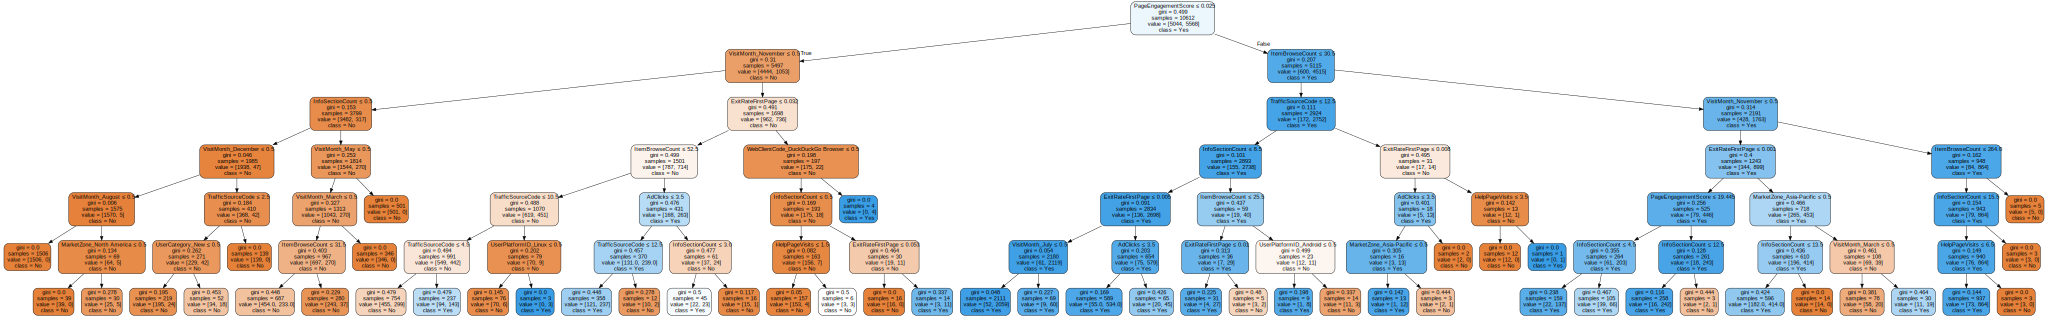

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None,
                                feature_names=X.columns,
                                class_names=['No','Yes'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)                #get roc/auc score

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_dt, y=tpr_dt, mode='lines', name=f'DT ROC (AUC={roc_auc_dt:.3f})'))
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Random Guess', line=dict(dash='dash', color='red')))
fig.update_layout(title='Decision Tree ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', template='plotly_white')
fig.show()            #plot ROC

## Model Training: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))               # accuracy

Accuracy: 0.8669932177844762

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1256
           1       0.88      0.87      0.87      1398

    accuracy                           0.87      2654
   macro avg       0.87      0.87      0.87      2654
weighted avg       0.87      0.87      0.87      2654


Confusion Matrix:
 [[1082  174]
 [ 179 1219]]


In [ ]:
rf_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", rf_coef_df)            # important features


Feature Importance:
                              Feature  Importance
5                PageEngagementScore    0.524248
4                  ExitRateFirstPage    0.104558
1                   InfoSectionCount    0.063923
3                    ItemBrowseCount    0.061303
19               VisitMonth_November    0.048796
7                  TrafficSourceCode    0.035586
0                           AdClicks    0.030251
6              HolidayProximityIndex    0.022468
8                   UserCategory_New    0.018873
9             UserCategory_Returning    0.017253
2                     HelpPageVisits    0.015964
18                    VisitMonth_May    0.012492
17                  VisitMonth_March    0.009712
29                UserPlatformID_iOS    0.003789
21              VisitMonth_September    0.002931
22            UserPlatformID_Android    0.002680
20                VisitMonth_October    0.002428
13               VisitMonth_December    0.002190
11               IsWeekendVisit_True    0.00204

In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)                #get roc/auc score

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name=f'RF ROC (AUC={roc_auc_rf:.3f})'))
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Random Guess', line=dict(dash='dash', color='red')))
fig.update_layout(title='Random Forest ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', template='plotly_white')
fig.show()          #plot ROC

- Random forest was initially overfitting and then I reduced the depth to 6 where the model was pretty stable.
- And from the f1, Recall and Presision we can say thatthe class balancing had a good effect.

## Model Training: XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(
    max_depth=4,
    n_estimators=50,
    learning_rate=0.01,
    subsample=0.4,
    colsample_bytree=0.5,
    reg_alpha=0.01,
    reg_lambda=1,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)       # train model
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))            # accuracy

Accuracy: 0.8654860587792012

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1256
           1       0.86      0.90      0.88      1398

    accuracy                           0.87      2654
   macro avg       0.87      0.86      0.86      2654
weighted avg       0.87      0.87      0.87      2654


Confusion Matrix:
 [[1044  212]
 [ 145 1253]]


In [ ]:
xgb_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", xgb_coef_df)            # important features


Feature Importance:
                              Feature  Importance
5                PageEngagementScore    0.591182
19               VisitMonth_November    0.063629
4                  ExitRateFirstPage    0.039956
8                   UserCategory_New    0.028929
9             UserCategory_Returning    0.026030
1                   InfoSectionCount    0.024461
17                  VisitMonth_March    0.024182
18                    VisitMonth_May    0.021024
3                    ItemBrowseCount    0.018818
6              HolidayProximityIndex    0.016767
0                           AdClicks    0.016756
21              VisitMonth_September    0.015230
7                  TrafficSourceCode    0.014013
20                VisitMonth_October    0.009338
2                     HelpPageVisits    0.008312
15                   VisitMonth_July    0.008271
14               VisitMonth_February    0.005886
10              IsWeekendVisit_False    0.005673
22            UserPlatformID_Android    0.00554

In [ ]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)                #get roc/auc score

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_xgb, y=tpr_xgb, mode='lines', name=f'XGB ROC (AUC={roc_auc_xgb:.3f})'))
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Random Guess', line=dict(dash='dash', color='red')))
fig.update_layout(title='XGBoost ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', template='plotly_white')
fig.show()        #plot ROC

###Model Summary

| Model             | Accuracy | Precision (Class 0) | Recall (Class 0) | F1-Score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Macro Avg F1 | Weighted Avg F1 |
|--------------------|-----------|----------------------|-------------------|--------------------|----------------------|------------------|--------------------|---------------|-----------------|
| **XGBoost**        | 0.865     | 0.88                 | 0.83              | 0.85               | 0.86                 | 0.90             | 0.88               | 0.86          | 0.87            |
| **Random Forest**  | 0.867     | 0.86                 | 0.86              | 0.86               | 0.88                 | 0.87             | 0.87               | 0.87          | 0.87            |
| **Decision Tree**  | 0.865     | 0.86                 | 0.86              | 0.86               | 0.87                 | 0.87             | 0.87               | 0.87          | 0.87            |
| **LogReg (Std)**   | 0.815     | 0.78                 | 0.85              | 0.81               | 0.85                 | 0.79             | 0.82               | 0.81          | 0.81            |
| **LogReg (Scaled)**| 0.814     | 0.77                 | 0.84              | 0.80               | 0.84                 | 0.78             | 0.81               | 0.81          | 0.81            |

- So clearly here the Random Forest model is showing a greater performance in comparison of other models
- And the accuracy precision is derived from the expected correlated variables initially inferred from the correlation heatmap which we can see is followed by the model coefficients.